# Customer Segmentation Analysis✅📖🎯

# Import modules

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings("ignore")

# Upload a dataset

In [2]:
df = pd.read_csv("Mall_Customers.csv")

## 1. Preprocessing of your data

## ask some basic question

### How big the data?

In [3]:
df.shape

(200, 5)

### How does the data look like?

In [4]:
df.sample(5)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
67,68,Female,68,48,48
163,164,Female,31,81,93
133,134,Female,31,72,71
33,34,Male,18,33,92
114,115,Female,18,65,48


### what is the data types of every columns?

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


### Is there any null value present or not?

In [6]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

### Understand a highly mathematical information?

In [7]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


## 2. EDA perform of your data

### a. Univariate analysis

In [8]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [9]:
df["Gender"].value_counts()

Female    112
Male       88
Name: Gender, dtype: int64

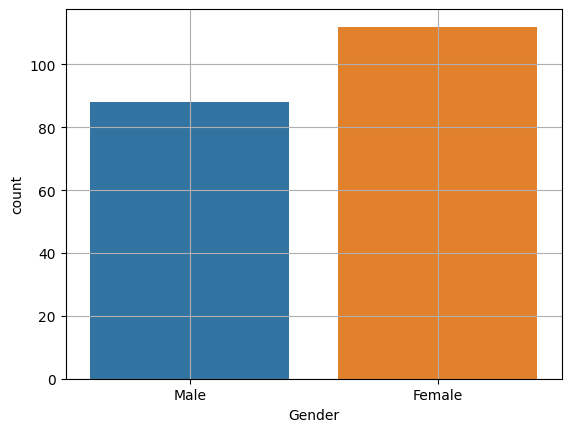

In [10]:
sns.countplot(data = df,x =df["Gender"])
plt.grid()

In [11]:
df[(df["Gender"]=="Male") & (df["Annual Income (k$)"]>100)]["Age"]

187    28
192    33
197    32
198    32
199    30
Name: Age, dtype: int64

<AxesSubplot: xlabel='Annual Income (k$)', ylabel='Density'>

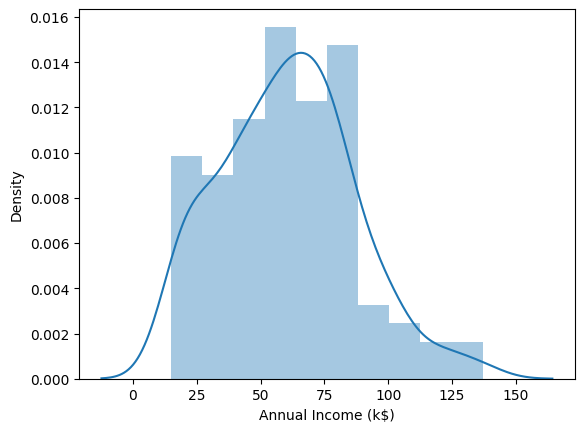

In [12]:
sns.distplot(df["Annual Income (k$)"])

In [13]:
df["Annual Income (k$)"].skew()

0.3218425498619055

In [14]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

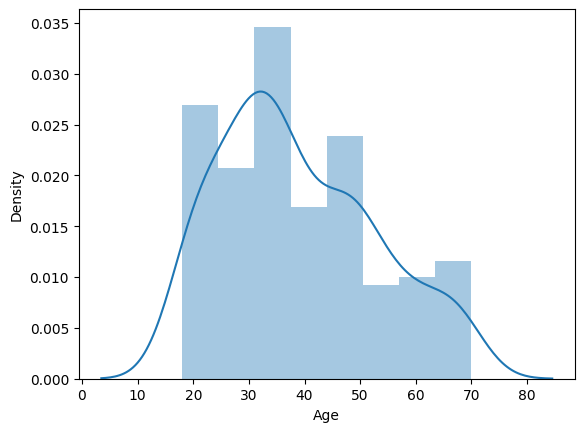

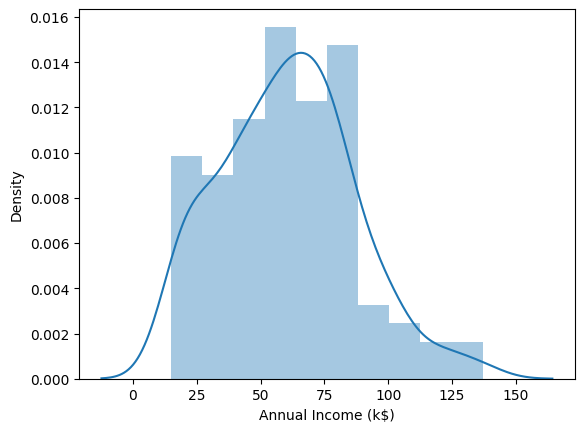

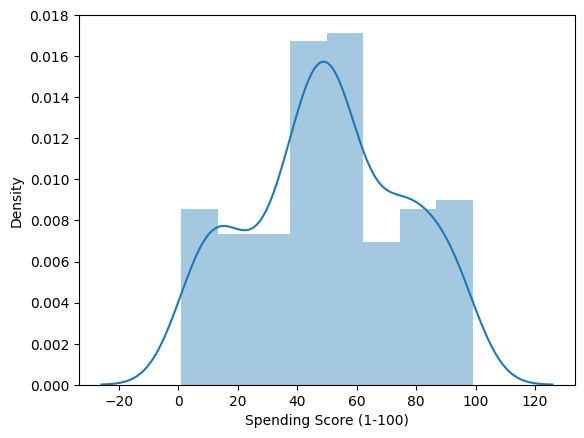

In [17]:
columns = ['Age', 'Annual Income (k$)','Spending Score (1-100)']
for i in columns:
    plt.figure()
    sns.distplot(df[i])

<AxesSubplot: xlabel='Annual Income (k$)', ylabel='Density'>

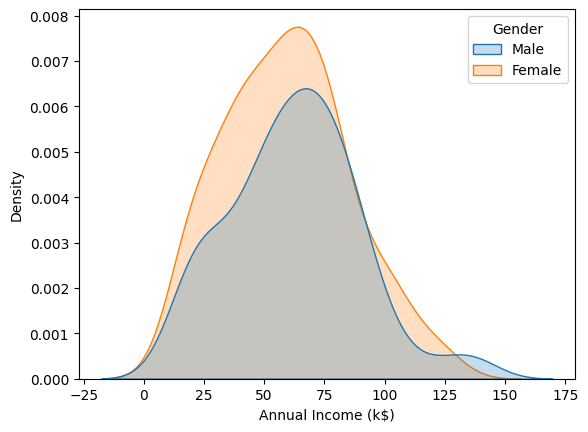

In [22]:
sns.kdeplot(data = df,x = df["Annual Income (k$)"],hue = "Gender",shade = True)

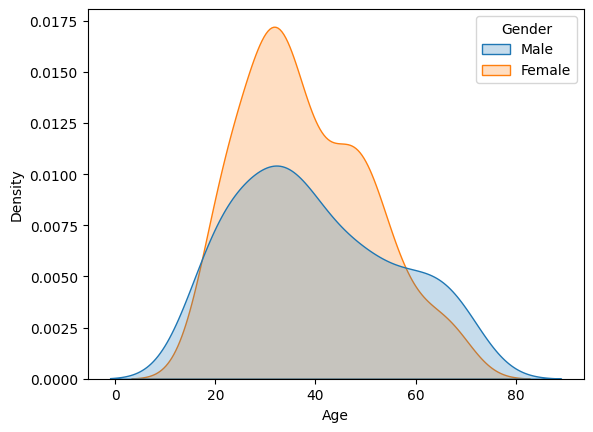

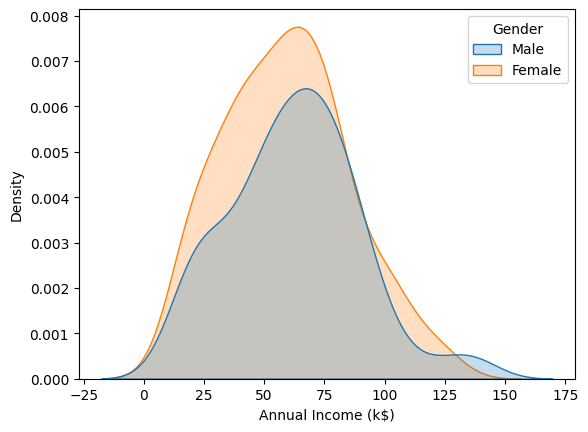

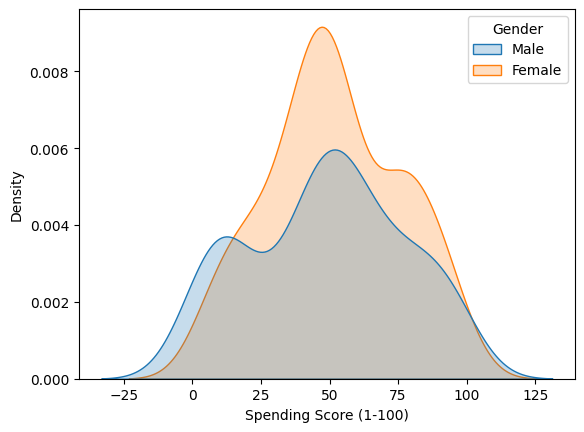

In [29]:
columns = ['Age', 'Annual Income (k$)','Spending Score (1-100)']
for i in columns:
    plt.figure()
    sns.kdeplot(data = df,x = df[i],hue = "Gender",shade = True)

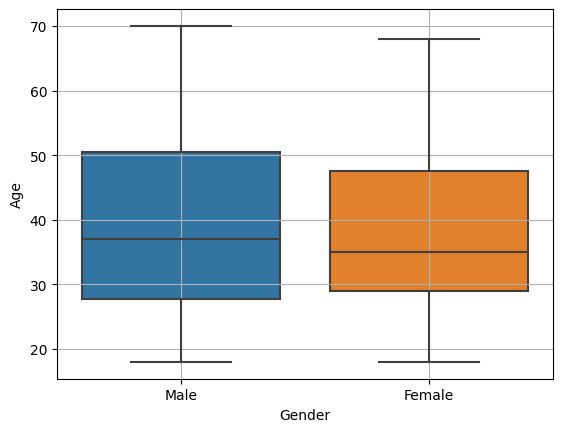

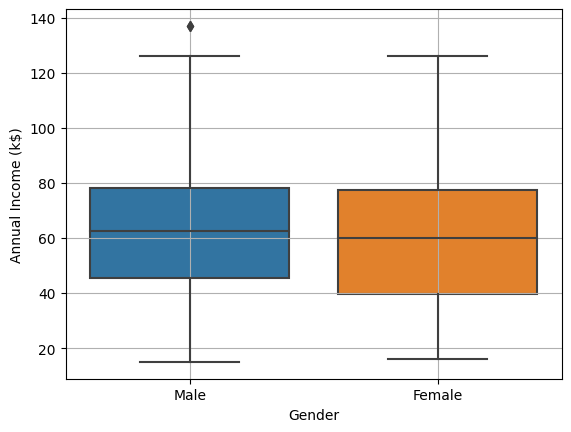

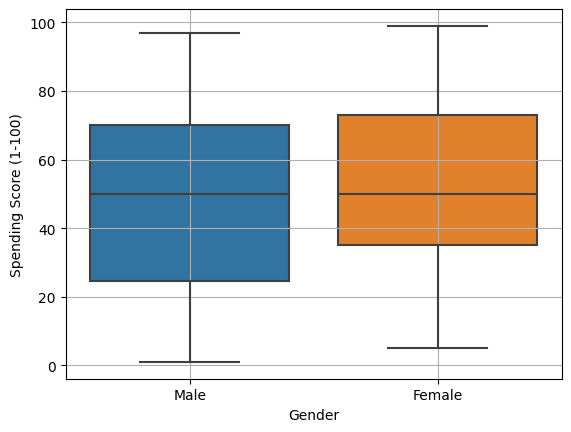

In [42]:
columns = ['Age', 'Annual Income (k$)','Spending Score (1-100)']
for i in columns:
    plt.figure()
    sns.boxplot(data = df,y = df[i],x= "Gender")
    plt.grid()

In [33]:
df['Annual Income (k$)'].skew()

0.3218425498619055

In [35]:
df["Age"].skew()

0.48556885096681657

In [36]:
df['Spending Score (1-100)'].skew()

-0.047220201374263374

In [45]:
df["Gender"].value_counts()/df["Gender"].count()

Female    0.56
Male      0.44
Name: Gender, dtype: float64

<AxesSubplot: ylabel='Gender'>

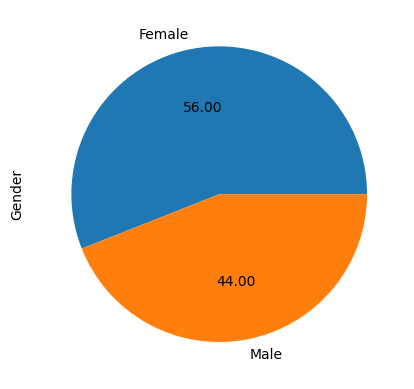

In [50]:
(df["Gender"].value_counts()/df["Gender"].count()).plot(kind = "pie",autopct = "%0.2f")

### b.Bivariate analysis

In [51]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

<AxesSubplot: xlabel='Age', ylabel='Spending Score (1-100)'>

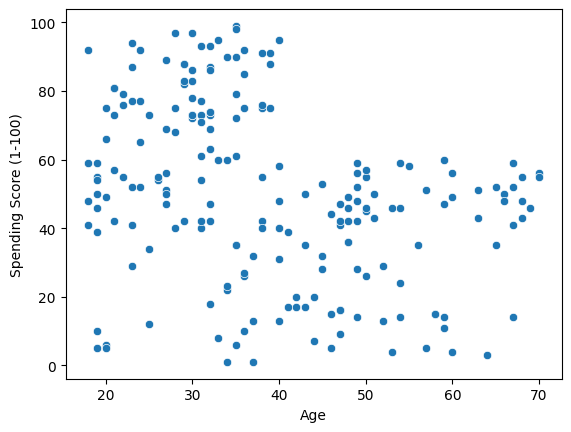

In [55]:
sns.scatterplot(data = df,x = df["Age"],y = df['Spending Score (1-100)'])

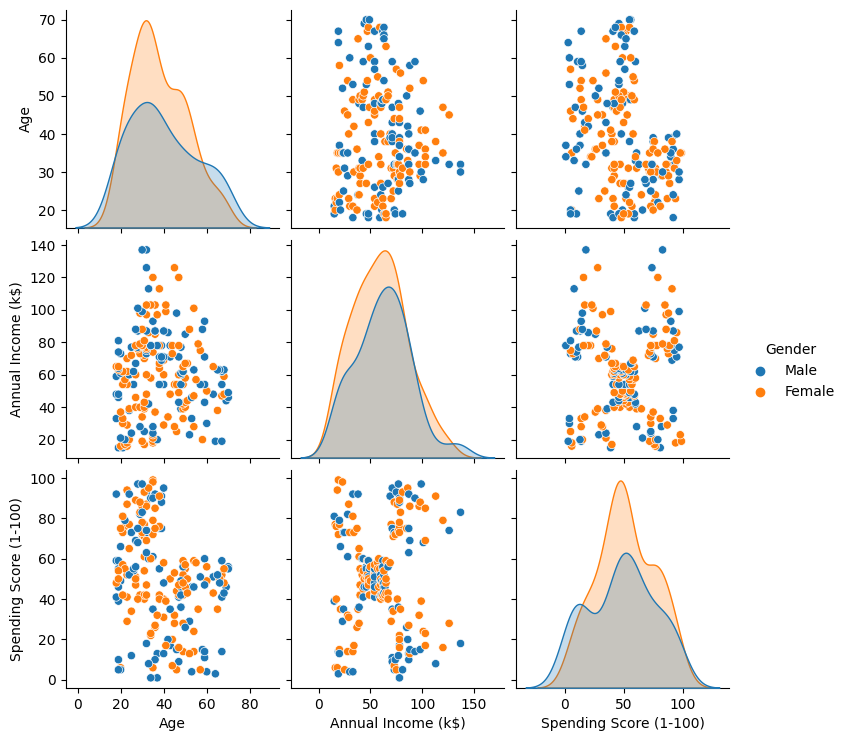

In [59]:
# df = df.drop("CustomerID",axis = "columns")
sns.pairplot(df,hue= "Gender")

In [60]:
df.groupby(["Gender"])['Age', 'Annual Income (k$)',
       'Spending Score (1-100)'].mean()

,Age,Annual Income (k$),Spending Score (1-100)
Gender,,,
Female,38.098214,59.250000,51.526786
Male,39.806818,62.227273,48.511364


In [61]:
df.groupby(["Gender"])['Age', 'Annual Income (k$)',
       'Spending Score (1-100)'].skew()

,Age,Annual Income (k$),Spending Score (1-100)
Gender,,,
Female,0.508871,0.301089,0.027857
Male,0.404684,0.346774,-0.063150


In [64]:
df.corr()

,Age,Annual Income (k$),Spending Score (1-100)
Age,1.000000,-0.012398,-0.327227
Annual Income (k$),-0.012398,1.000000,0.009903
Spending Score (1-100),-0.327227,0.009903,1.000000


<AxesSubplot: >

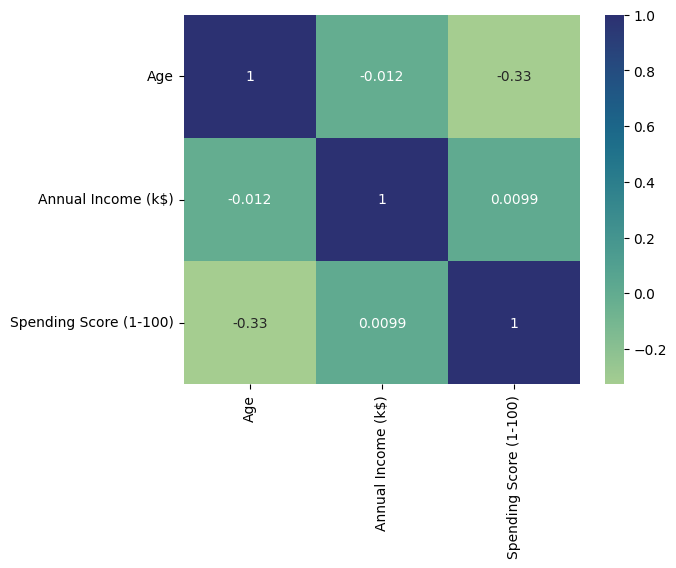

In [66]:
sns.heatmap(df.corr(),annot=True,cmap="crest")

### Clustering - Univarite, Bivariate, Multivariate

In [81]:
clustering1 = KMeans(n_clusters=3)

In [82]:
clustering1.fit(df[["Annual Income (k$)"]])

KMeans(n_clusters=3)

In [83]:
clustering1.labels_

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1])

In [84]:
df["Income Cluster"] = clustering1.labels_
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster
0,Male,19,15,39,2
1,Male,21,15,81,2
2,Female,20,16,6,2
3,Female,23,16,77,2
4,Female,31,17,40,2


In [85]:
df["Income Cluster"].value_counts()

0    92
2    72
1    36
Name: Income Cluster, dtype: int64

In [86]:
clustering1.inertia_

23528.152173913055

In [87]:
inertia_scores =[]
for i in range(1,11):
    km = KMeans(n_clusters=i)
    km.fit(df[['Annual Income (k$)']])
    inertia_scores.append(km.inertia_)

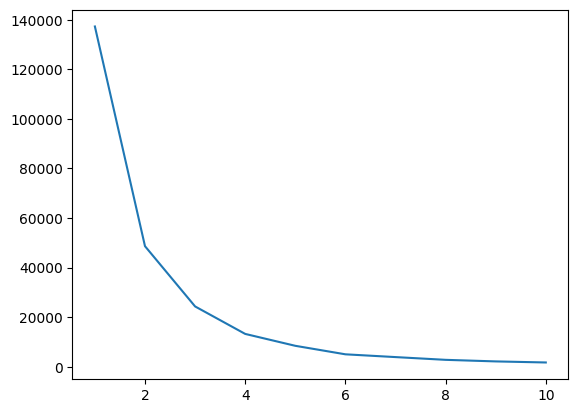

In [88]:
plt.plot(range(1,11),inertia_scores)

In [89]:
df.columns

Index(['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)',
       'Income Cluster'],
      dtype='object')

In [90]:
df.groupby("Income Cluster")['Age', 'Annual Income (k$)', 'Spending Score (1-100)'].mean()

,Age,Annual Income (k$),Spending Score (1-100)
Income Cluster,,,
0,39.184783,66.717391,50.054348
1,37.833333,99.888889,50.638889
2,38.930556,33.027778,50.166667


In [95]:
clustering2 = KMeans(n_clusters=5)
clustering2.fit(df[['Annual Income (k$)', 'Spending Score (1-100)']])
df["spending and Income Cluster"] = clustering2.labels_
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster,spending and Income Cluster
0,Male,19,15,39,2,2
1,Male,21,15,81,2,4
2,Female,20,16,6,2,2
3,Female,23,16,77,2,4
4,Female,31,17,40,2,2


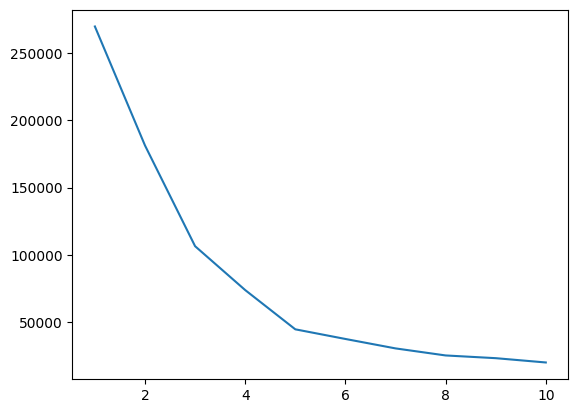

In [96]:
inertia_scores2=[]
for i in range(1,11):
    km2= KMeans(n_clusters=i)
    km2.fit(df[['Annual Income (k$)', 'Spending Score (1-100)']])
    inertia_scores2.append(km2.inertia_)
plt.plot(range(1,11),inertia_scores2)

In [128]:
center = pd.DataFrame(clustering2.cluster_centers_)
center.columns = ["X","Y"]

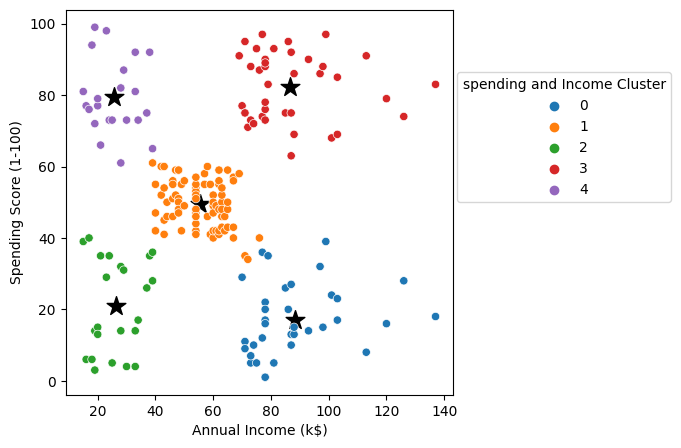

In [132]:
plt.figure(figsize=(5,5))
plt.scatter(x=center["X"],y = center["Y"],marker="*",s =200,c = "k")
sns.scatterplot(data = df,x ='Annual Income (k$)' ,y = 'Spending Score (1-100)',hue ='spending and Income Cluster',palette = "tab10")
plt.legend(loc = (1.1,0.5))
plt.legend(title ='spending and Income Cluster',loc = (1.01,0.5) )